In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_opencl = pd.read_csv("dot_times_withOutGPU.csv",sep = ";")
df_GPU = pd.read_csv("dot_times_withOutGPU.csv",sep = ";")
df_opencl

,N,CPU_time,opencl_time,factor_opencl_CPU,GPU_time,factor_opencl_GPU
0,10,0.000022,0.000033,0.666667,0.003654,0.006021
1,100,0.000037,0.000039,0.948718,0.003234,0.011441
2,1000,0.000246,0.000032,7.687500,0.004439,0.055418
3,10000,0.003033,0.000037,81.973000,0.003344,0.906998
4,30000,0.008328,0.000049,169.959000,0.003643,2.286030
5,60000,0.015970,0.000034,469.706000,0.004015,3.977580
6,100000,0.026982,0.000069,391.043000,0.003247,8.309820
7,300000,0.089862,0.000170,528.600000,0.003358,26.760600
8,600000,0.183562,0.000973,188.656000,0.003301,55.608000
9,1000000,0.304106,0.002440,124.634000,0.003931,77.361000


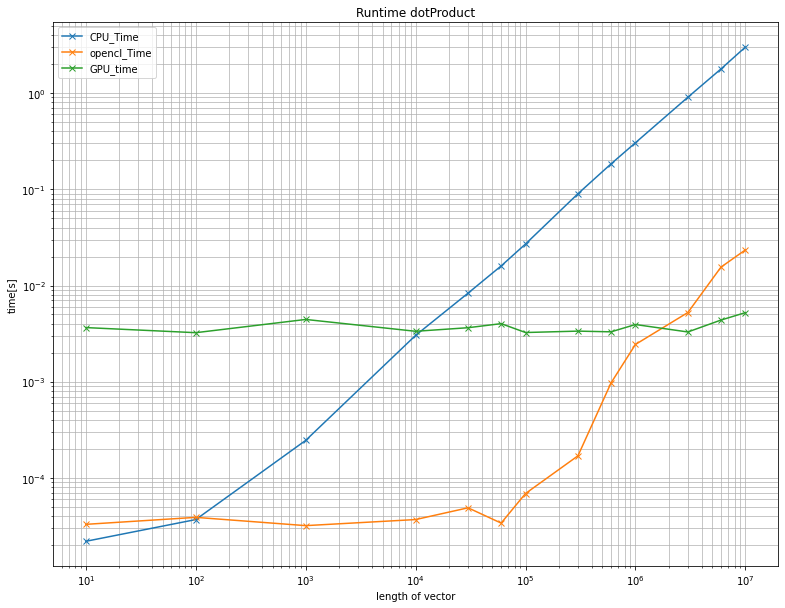

In [3]:
plt.figure(figsize=(13,10))
plt.loglog(df_opencl["N"],df_opencl["CPU_time"], label = "CPU_Time", marker='x')
plt.loglog(df_opencl["N"],df_opencl["opencl_time"], label = "opencl_Time", marker='x')
plt.loglog(df_opencl["N"],df_GPU["GPU_time"], label = "GPU_time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Runtime dotProduct")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/Runtime_dotProduct")

Text(0, 0.5, 'time[s]')

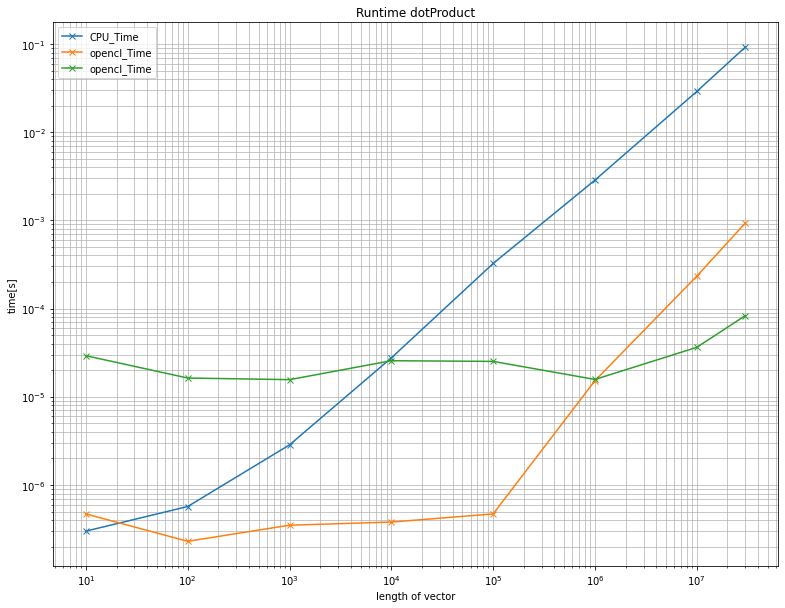

In [4]:
N = [10,100, 1000, 10000, 100000, 1000000, 10000000, 30000000]
CPU_time = [3e-07, 5.7e-07, 2.85e-06, 2.759e-05, 0.00032447, 0.00286088, 0.0289263, 0.0921195]
opencl_time = [4.7e-07,2.3e-07, 3.5e-07, 3.8e-07, 4.7e-07, 1.523e-05, 0.00023278, 0.00093314]
GPU_time = [2.922e-05, 1.632e-05, 1.564e-05, 2.564e-05, 2.519e-05, 1.573e-05, 3.635e-05,8.328e-05]
factor_CPU_opencl = [0.638298, 2.47826, 8.14286, 72.6053, 690.362, 187.845, 124.265, 98.7199]
factor_CPU_GPU = [0.00773196, 0.0181319, 0.0954561, 1.11926, 10.0644, 171.597, 842.527, 1095.57]

plt.figure(figsize=(13,10))
plt.loglog(N,CPU_time, label = "CPU_Time", marker='x')
plt.loglog(N,opencl_time, label = "opencl_Time", marker='x')
plt.loglog(N,GPU_time, label = "opencl_Time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Runtime dotProduct")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
#plt.savefig("Bilder/Runtime_dotProduct")

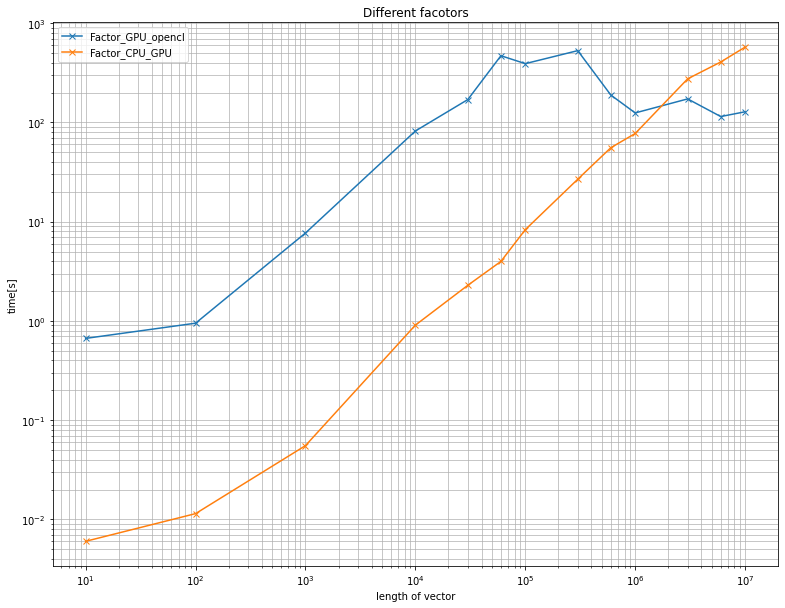

In [5]:
plt.figure(figsize=(13,10))
plt.loglog(df_opencl["N"],df_opencl["factor_opencl_CPU"], label = "Factor_GPU_opencl", marker='x')
plt.loglog(df_opencl["N"],df_GPU["factor_opencl_GPU"], label = "Factor_CPU_GPU", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Different facotors")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/diff_factor")

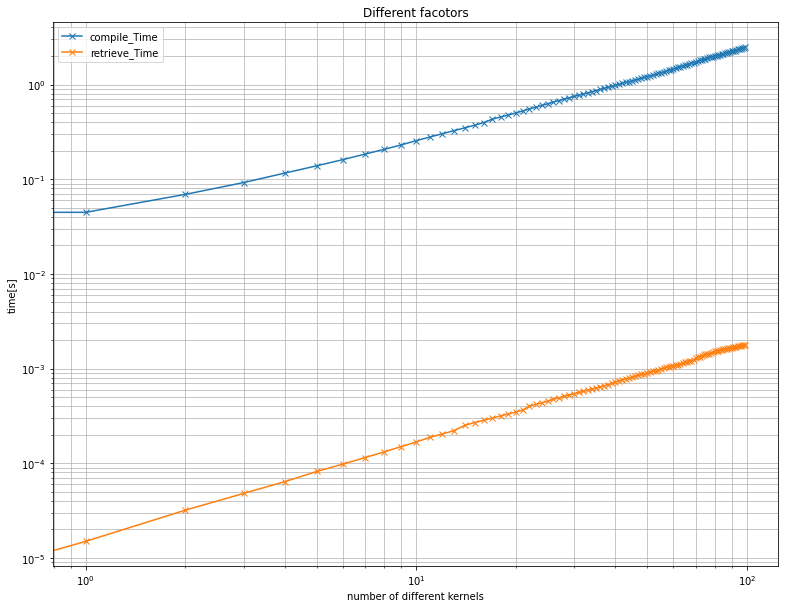

In [6]:
df_raw = pd.read_csv("csv_diffKernels.csv",sep = ";")
othertimes = []
cleantimes = []
othertimes = df_raw["retrieve_Time"] - df_raw["compile_Time"]
for i in range(len(df_raw["M"])):
    cleantimes.append(np.sum(othertimes[0:i]))
plt.figure(figsize=(13,10))
plt.loglog(df_raw["M"],df_raw["compile_Time"], label = "compile_Time", marker='x')
plt.loglog(df_raw["M"],cleantimes, label = "retrieve_Time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Different facotors")
plt.xlabel("number of different kernels")
plt.ylabel("time[s]")
plt.savefig("Bilder/Time_to_compile_and_clean")

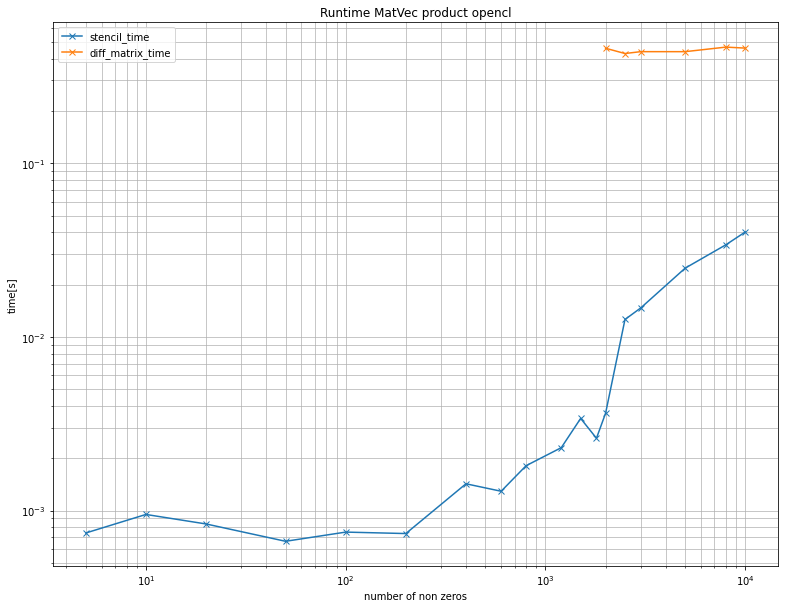

In [14]:
M = [5, 10, 20, 50, 100, 200, 400, 600, 800, 1200, 1500, 1800, 2000, 2500, 3000, 5000, 8000, 10000]
stencil_time = [0.00074243, 0.0009493, 0.00083683, 0.00066503, 0.00075127, 0.00073689, 0.00142565, 0.00129136, 0.00181255, 0.00230216, 0.00339183,0.00260833,  0.00363797, 0.0125974, 0.0146893, 0.0248755, 0.0339269, 0.0402036]
M2 = [2000, 2500, 3000, 5000, 8000, 10000]
genmat2_time = [0.459676, 0.42878, 0.439455, 0.439389,0.466773, 0.460689]



plt.figure(figsize=(13,10))
plt.loglog(M,stencil_time, label = "stencil_time", marker='x')
plt.loglog(M2,genmat2_time, label = "diff_matrix_time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Runtime MatVec product opencl")
plt.xlabel("number of non zeros")
plt.ylabel("time[s]")
plt.savefig("Bilder/Runtime_MatVec_product_opencl")